# The Spark Foundation
Data Science and business Analytics Intern

Data Source : https://github.com/soni811/Prediction-Using-Supervised-ML/blob/main/student_scores%20-%20student_scores.csv

Author : Ritik Soni


### Task 1 : Prediction Using Supervised ML

##### Step1 : Import necessary Library
##### Step2 : Reading The Dataset from Source url
##### Step3 : Exploring Data
##### Step4 : Linear Regression
##### Step5 : Predicting Score If a Student Studies for 9.25 hours/day?
##### Step6 : Evaluation of Model

#### In this task Predict the percentage of an student based on the no. of study hours and What will be the predicted score if a student studies for 9.25 hours/day.

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Reading The Dataset from Source url

In [16]:
df = pd.read_csv("https://github.com/soni811/Prediction-Using-Supervised-ML/blob/main/student_scores%20-%20student_scores.csv")

ParserError: Error tokenizing data. C error: Expected 1 fields in line 128, saw 2


#### Exploring Data

In [17]:
print(df.shape)
df.head()

(25, 2)


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [18]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 480.0 bytes


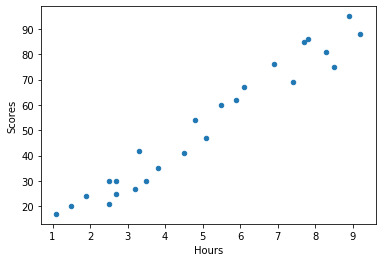

In [20]:
df.plot(kind='scatter',x='Hours',y='Scores');
plt.show()

In [21]:
df.corr(method='pearson')

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [22]:
df.corr(method='spearman')

,Hours,Scores
Hours,1.000000,0.971891
Scores,0.971891,1.000000


In [23]:
hours=df['Hours']
scores=df['Scores']

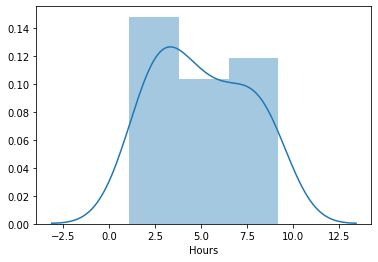

In [24]:
sns.distplot(hours)

c:\program files\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Scores', ylabel='Density'>

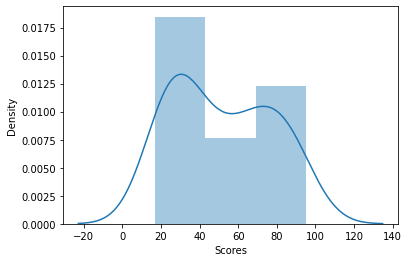

In [11]:
sns.distplot(scores)

#### Linear Regression

In [25]:
X = df.iloc[:,:-1].values
y = df.iloc[:,1].values

In [26]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=50)

In [27]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

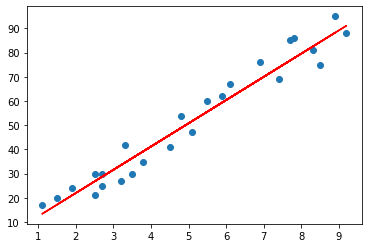

In [15]:
m=reg.coef_
c=reg.intercept_
line=m*X+c
plt.scatter(X,y)
plt.plot(X, line,color='red')
plt.show()

In [28]:
y_pred=reg.predict(X_test)

In [29]:
actual_predicted=pd.DataFrame({'Target':y_test,'Predicted':y_pred})
actual_predicted

,Target,Predicted
0,95,88.211394
1,30,28.718453
2,76,69.020122
3,35,39.273652
4,17,13.365436


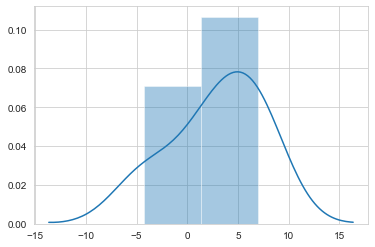

In [30]:
sns.set_style('whitegrid')
sns.distplot(np.array(y_test-y_pred))
plt.show()

#### Predicting Score If a Student Studies for 9.25 hours/day?

In [31]:
h=9.25
s=reg.predict([[h]])
print("If a studies for {} hours per day he/she will score {} % in exam.".format(h,s))

If a studies for 9.25 hours per day he/she will score [91.56986604] % in exam.


#### Evaluation of Model

In [32]:
from sklearn import metrics
from sklearn.metrics import r2_score
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,y_pred))
print('R2 Score:',r2_score(y_test,y_pred))

Mean Absolute Error: 4.5916495300630285
R2 Score: 0.971014141329942
